## Python version

In [1]:
from platform import python_version
print(python_version())

3.6.5


## Import Libraries

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
tf.random.set_seed(1234)

In [4]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf


from math import sqrt
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM


dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

## Data Import and Manipulation

In [5]:
train_df = pd.read_csv("H2full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [6]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [7]:
df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
79325,2017,35
79326,2017,35
79327,2017,35
79328,2017,35


In [8]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
79325    201735
79326    201735
79327    201735
79328    201735
79329    201735
Length: 79330, dtype: object


In [9]:
df2 = DataFrame(c, columns= ['ADR']) 
df2

,ADR
0,0.00
1,76.50
2,68.00
3,76.50
4,76.50
...,...
79325,96.14
79326,225.43
79327,157.71
79328,104.40


In [10]:
type(df1)

pandas.core.frame.DataFrame

In [11]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'ADR']

In [12]:
df3
df3.sort_values(['FullDate','ADR'], ascending=True)

,FullDate,ADR
0,201527,0.00
11,201527,43.00
6,201527,58.67
29,201527,60.00
36141,201527,60.00
...,...,...
79084,201735,259.00
79305,201735,266.75
79010,201735,270.00
79091,201735,270.00


In [13]:
df4 = df3.groupby('FullDate').agg("mean")
df4
df4.sort_values(['FullDate'], ascending=True)

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201731,138.898408
201732,142.909221
201733,144.839923


In [14]:
tseries=df4['ADR']
tseries

FullDate
201527     78.165879
201528     70.247336
201529     73.996534
201530     66.766446
201531     65.363578
             ...    
201731    138.898408
201732    142.909221
201733    144.839923
201734    135.892708
201735    128.586952
Name: ADR, Length: 115, dtype: float64

In [15]:
# https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html
res = sm.tsa.ARMA(tseries, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10])

/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/michael/.local/lib/python3.6/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([5.48711087]), array([0.85635882]))

In [16]:
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.509649
p-value: 0.528733
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


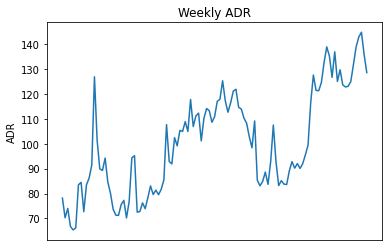

In [17]:
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('ADR')
plt.title("Weekly ADR")
plt.show()

In [18]:
df=pd.DataFrame(tseries)
df

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201731,138.898408
201732,142.909221
201733,144.839923


In [19]:
df.to_csv("weekly adr h2.csv", sep='\t', encoding='utf-8')

In [20]:
df = df[:100]

In [21]:
df

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201716,121.461748
201717,121.316925
201718,124.661435


In [22]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
df

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201716,121.461748
201717,121.316925
201718,124.661435


## Normalize dataset with MinMaxScaler

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.17394983],
       [0.06635752],
       [0.11729932],
       [0.01906132],
       [0.        ],
       [0.01126313],
       [0.24639556],
       [0.25964283],
       [0.09947309],
       [0.24576306],
       [0.28316233],
       [0.35448622],
       [0.83647103],
       [0.48979137],
       [0.33351757],
       [0.32476797],
       [0.39244271],
       [0.26195377],
       [0.20032856],
       [0.11274354],
       [0.08053814],
       [0.07934428],
       [0.13799894],
       [0.16147725],
       [0.06540364],
       [0.15557826],
       [0.39323464],
       [0.40556934],
       [0.09735725],
       [0.1002107 ],
       [0.14762734],
       [0.11598137],
       [0.1759088 ],
       [0.24035225],
       [0.19330065],
       [0.21743866],
       [0.1922823 ],
       [0.22195395],
       [0.27295638],
       [0.57536981],
       [0.37368255],
       [0.36078985],
       [0.5039237 ],
       [0.45917583],
       [0.54369246],
       [0.53801535],
       [0.59179033],
       [0.537

In [25]:
# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

In [26]:
X_train

array([[0.17394983, 0.06635752, 0.11729932, 0.01906132, 0.        ],
       [0.06635752, 0.11729932, 0.01906132, 0.        , 0.01126313],
       [0.11729932, 0.01906132, 0.        , 0.01126313, 0.24639556],
       [0.01906132, 0.        , 0.01126313, 0.24639556, 0.25964283],
       [0.        , 0.01126313, 0.24639556, 0.25964283, 0.09947309],
       [0.01126313, 0.24639556, 0.25964283, 0.09947309, 0.24576306],
       [0.24639556, 0.25964283, 0.09947309, 0.24576306, 0.28316233],
       [0.25964283, 0.09947309, 0.24576306, 0.28316233, 0.35448622],
       [0.09947309, 0.24576306, 0.28316233, 0.35448622, 0.83647103],
       [0.24576306, 0.28316233, 0.35448622, 0.83647103, 0.48979137],
       [0.28316233, 0.35448622, 0.83647103, 0.48979137, 0.33351757],
       [0.35448622, 0.83647103, 0.48979137, 0.33351757, 0.32476797],
       [0.83647103, 0.48979137, 0.33351757, 0.32476797, 0.39244271],
       [0.48979137, 0.33351757, 0.32476797, 0.39244271, 0.26195377],
       [0.33351757, 0.32476797, 0.

In [27]:
Y_train

array([0.01126313, 0.24639556, 0.25964283, 0.09947309, 0.24576306,
       0.28316233, 0.35448622, 0.83647103, 0.48979137, 0.33351757,
       0.32476797, 0.39244271, 0.26195377, 0.20032856, 0.11274354,
       0.08053814, 0.07934428, 0.13799894, 0.16147725, 0.06540364,
       0.15557826, 0.39323464, 0.40556934, 0.09735725, 0.1002107 ,
       0.14762734, 0.11598137, 0.1759088 , 0.24035225, 0.19330065,
       0.21743866, 0.1922823 , 0.22195395, 0.27295638, 0.57536981,
       0.37368255, 0.36078985, 0.5039237 , 0.45917583, 0.54369246,
       0.53801535, 0.59179033, 0.53773102, 0.71273958, 0.56473889,
       0.62261674, 0.63795482, 0.4863144 , 0.6095559 , 0.66332211,
       0.65120655, 0.5882372 , 0.61841441, 0.70247603, 0.71387475,
       0.81488874, 0.70577535, 0.6431417 , 0.69376344, 0.75834494,
       0.76853419, 0.67014112, 0.660419  , 0.61070662, 0.58255007,
       0.50869571, 0.44843338, 0.59540446, 0.27199967, 0.24101317,
       0.26460434, 0.316027  , 0.24883798, 0.37251176])

## Configure LSTM Model

Epoch 1/100
59/59 - 0s - loss: 0.0687 - val_loss: 0.0281
Epoch 2/100
59/59 - 0s - loss: 0.0279 - val_loss: 0.0134
Epoch 3/100
59/59 - 0s - loss: 0.0188 - val_loss: 0.0171
Epoch 4/100
59/59 - 0s - loss: 0.0179 - val_loss: 0.0168
Epoch 5/100
59/59 - 0s - loss: 0.0176 - val_loss: 0.0185
Epoch 6/100
59/59 - 0s - loss: 0.0174 - val_loss: 0.0183
Epoch 7/100
59/59 - 0s - loss: 0.0172 - val_loss: 0.0195
Epoch 8/100
59/59 - 0s - loss: 0.0171 - val_loss: 0.0164
Epoch 9/100
59/59 - 0s - loss: 0.0171 - val_loss: 0.0169
Epoch 10/100
59/59 - 0s - loss: 0.0168 - val_loss: 0.0163
Epoch 11/100
59/59 - 0s - loss: 0.0166 - val_loss: 0.0156
Epoch 12/100
59/59 - 0s - loss: 0.0166 - val_loss: 0.0180
Epoch 13/100
59/59 - 0s - loss: 0.0163 - val_loss: 0.0157
Epoch 14/100
59/59 - 0s - loss: 0.0162 - val_loss: 0.0171
Epoch 15/100
59/59 - 0s - loss: 0.0160 - val_loss: 0.0181
Epoch 16/100
59/59 - 0s - loss: 0.0159 - val_loss: 0.0160
Epoch 17/100
59/59 - 0s - loss: 0.0157 - val_loss: 0.0166
Epoch 18/100
59/59 - 0s

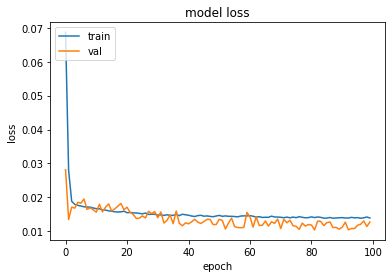

In [28]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [30]:
trainpred

array([[0.10634624],
       [0.10448408],
       [0.23365709],
       [0.23645721],
       [0.17000815],
       [0.27228588],
       [0.2799403 ],
       [0.34109008],
       [0.62990713],
       [0.44773716],
       [0.42526758],
       [0.38428533],
       [0.41782713],
       [0.31086338],
       [0.2714721 ],
       [0.19735722],
       [0.16816074],
       [0.15524375],
       [0.1842866 ],
       [0.1953394 ],
       [0.14403164],
       [0.20351593],
       [0.3340366 ],
       [0.34985405],
       [0.18497048],
       [0.20051502],
       [0.2012481 ],
       [0.1751297 ],
       [0.21297707],
       [0.24864511],
       [0.22719054],
       [0.25223398],
       [0.23355967],
       [0.25619486],
       [0.28430656],
       [0.4754182 ],
       [0.35690343],
       [0.40246856],
       [0.4802894 ],
       [0.4571855 ],
       [0.52900124],
       [0.52333534],
       [0.5823733 ],
       [0.54686654],
       [0.6761868 ],
       [0.5743172 ],
       [0.64631927],
       [0.632

In [31]:
valpred

array([[0.28575575],
       [0.328982  ],
       [0.3604498 ],
       [0.3483395 ],
       [0.37597996],
       [0.35772264],
       [0.3801815 ],
       [0.40734434],
       [0.44718522],
       [0.6030078 ],
       [0.7069023 ],
       [0.7172831 ],
       [0.76314926],
       [0.7991921 ]], dtype=float32)

In [32]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [33]:
Y_train.shape

(1, 74)

In [34]:
Y_val.shape

(1, 14)

In [35]:
X_train.shape

(74, 1, 5)

In [36]:
X_val.shape

(14, 1, 5)

In [37]:
Y_train

array([[ 66.19251773,  83.49771567,  84.47268398,  72.68456522,
         83.45116535,  86.20366422,  91.45293608, 126.92589397,
        101.41107955,  89.9096928 ,  89.26574257,  94.24644567,
         84.64276423,  80.10729242,  73.66123894,  71.29099688,
         71.20313158,  75.51997732,  77.24792627,  70.17713287,
         76.81377451,  94.30473002,  95.21253521,  72.52884422,
         72.73885106,  76.22860526,  73.89953608,  78.31005495,
         83.05294239,  79.5900545 ,  81.36655536,  79.51510608,
         81.69887067,  85.45253049, 107.70945313,  92.86574132,
         91.91686905, 102.45118665,  99.15784753, 105.37807425,
        104.96025199, 108.91796547, 104.93932653, 117.81954795,
        106.92704225, 111.18671756, 112.31556444, 101.15518268,
        110.22546968, 114.18253731, 113.29086053, 108.65646341,
        110.87743553, 117.06417476, 117.90309371, 125.33748775,
        117.30699725, 112.6973067 , 116.42294872, 121.17599585,
        121.92590126, 114.68440079, 113.

In [38]:
Y_val

array([[ 89.19876623,  92.82290682,  90.20431193,  92.04525896,
         90.06917483,  91.99566508,  95.53501946,  99.44500705,
        116.58657688, 127.64236479, 121.46174792, 121.31692451,
        124.66143536, 132.63951467]])

In [39]:
X_train

array([[[0.17394983, 0.06635752, 0.11729932, 0.01906132, 0.        ]],

       [[0.06635752, 0.11729932, 0.01906132, 0.        , 0.01126313]],

       [[0.11729932, 0.01906132, 0.        , 0.01126313, 0.24639556]],

       [[0.01906132, 0.        , 0.01126313, 0.24639556, 0.25964283]],

       [[0.        , 0.01126313, 0.24639556, 0.25964283, 0.09947309]],

       [[0.01126313, 0.24639556, 0.25964283, 0.09947309, 0.24576306]],

       [[0.24639556, 0.25964283, 0.09947309, 0.24576306, 0.28316233]],

       [[0.25964283, 0.09947309, 0.24576306, 0.28316233, 0.35448622]],

       [[0.09947309, 0.24576306, 0.28316233, 0.35448622, 0.83647103]],

       [[0.24576306, 0.28316233, 0.35448622, 0.83647103, 0.48979137]],

       [[0.28316233, 0.35448622, 0.83647103, 0.48979137, 0.33351757]],

       [[0.35448622, 0.83647103, 0.48979137, 0.33351757, 0.32476797]],

       [[0.83647103, 0.48979137, 0.33351757, 0.32476797, 0.39244271]],

       [[0.48979137, 0.33351757, 0.32476797, 0.39244271, 0.26195

In [40]:
X_val

array([[[0.37223323, 0.24205107, 0.2691728 , 0.24987543, 0.24818941]],

       [[0.24205107, 0.2691728 , 0.24987543, 0.24818941, 0.32385794]],

       [[0.2691728 , 0.24987543, 0.24818941, 0.32385794, 0.37310054]],

       [[0.24987543, 0.24818941, 0.32385794, 0.37310054, 0.33752068]],

       [[0.24818941, 0.32385794, 0.37310054, 0.33752068, 0.36253434]],

       [[0.32385794, 0.37310054, 0.33752068, 0.36253434, 0.33568452]],

       [[0.37310054, 0.33752068, 0.36253434, 0.33568452, 0.36186048]],

       [[0.33752068, 0.36253434, 0.33568452, 0.36186048, 0.40995106]],

       [[0.36253434, 0.33568452, 0.36186048, 0.40995106, 0.46307758]],

       [[0.33568452, 0.36186048, 0.40995106, 0.46307758, 0.69598672]],

       [[0.36186048, 0.40995106, 0.46307758, 0.69598672, 0.84620599]],

       [[0.40995106, 0.46307758, 0.69598672, 0.84620599, 0.76222756]],

       [[0.46307758, 0.69598672, 0.84620599, 0.76222756, 0.76025979]],

       [[0.69598672, 0.84620599, 0.76222756, 0.76025979, 0.80570

In [41]:
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 8.52 RMSE
Validation Score: 7.64 RMSE


In [42]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [43]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

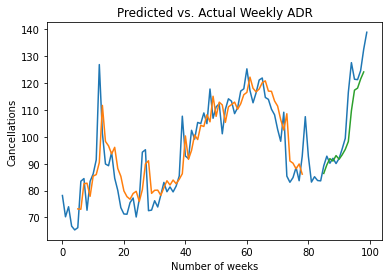

In [44]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Weekly ADR")
plt.show()

In [45]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [46]:
Y_val

0      89.198766
1      92.822907
2      90.204312
3      92.045259
4      90.069175
5      91.995665
6      95.535019
7      99.445007
8     116.586577
9     127.642365
10    121.461748
11    121.316925
12    124.661435
13    132.639515
dtype: float64

In [47]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [48]:
predictions

0      86.394539
1      89.575890
2      91.891846
3      91.000549
4      93.034828
5      91.691132
6      93.344048
7      95.343178
8      98.275368
9     109.743546
10    117.389938
11    118.153946
12    121.529587
13    124.182251
dtype: float32

In [49]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [50]:
mda(Y_val, predictions)

0.8571428571428571

In [51]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 7.636590


In [52]:
forecast_error = (predictions-Y_val)
forecast_error

0     -2.804227
1     -3.247017
2      1.687534
3     -1.044710
4      2.965653
5     -0.304533
6     -2.190972
7     -4.101829
8    -18.311209
9    -17.898819
10    -4.071810
11    -3.162979
12    -3.131849
13    -8.457264
dtype: float64

In [53]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-4.57671646937686

In [54]:
X_train

array([[[0.17394983, 0.06635752, 0.11729932, 0.01906132, 0.        ]],

       [[0.06635752, 0.11729932, 0.01906132, 0.        , 0.01126313]],

       [[0.11729932, 0.01906132, 0.        , 0.01126313, 0.24639556]],

       [[0.01906132, 0.        , 0.01126313, 0.24639556, 0.25964283]],

       [[0.        , 0.01126313, 0.24639556, 0.25964283, 0.09947309]],

       [[0.01126313, 0.24639556, 0.25964283, 0.09947309, 0.24576306]],

       [[0.24639556, 0.25964283, 0.09947309, 0.24576306, 0.28316233]],

       [[0.25964283, 0.09947309, 0.24576306, 0.28316233, 0.35448622]],

       [[0.09947309, 0.24576306, 0.28316233, 0.35448622, 0.83647103]],

       [[0.24576306, 0.28316233, 0.35448622, 0.83647103, 0.48979137]],

       [[0.28316233, 0.35448622, 0.83647103, 0.48979137, 0.33351757]],

       [[0.35448622, 0.83647103, 0.48979137, 0.33351757, 0.32476797]],

       [[0.83647103, 0.48979137, 0.33351757, 0.32476797, 0.39244271]],

       [[0.48979137, 0.33351757, 0.32476797, 0.39244271, 0.26195

In [55]:
X_train.shape

(74, 1, 5)

## Validate predictions on test data

In [56]:
Xnew = np.array([tseries.iloc[95:100],tseries.iloc[96:101],tseries.iloc[97:102],tseries.iloc[98:103],tseries.iloc[99:104],tseries.iloc[100:105],tseries.iloc[101:106],tseries.iloc[102:107],tseries.iloc[103:108],tseries.iloc[104:109],tseries.iloc[105:110],tseries.iloc[106:111],tseries.iloc[107:112],tseries.iloc[108:113],tseries.iloc[109:114]])

In [57]:
Xnew

array([[121.46174792, 121.31692451, 124.66143536, 132.63951467,
        138.96124481],
       [121.31692451, 124.66143536, 132.63951467, 138.96124481,
        135.29018595],
       [124.66143536, 132.63951467, 138.96124481, 135.29018595,
        126.70549121],
       [132.63951467, 138.96124481, 135.29018595, 126.70549121,
        136.96731501],
       [138.96124481, 135.29018595, 126.70549121, 136.96731501,
        125.04368653],
       [135.29018595, 126.70549121, 136.96731501, 125.04368653,
        129.75435252],
       [126.70549121, 136.96731501, 125.04368653, 129.75435252,
        123.69777658],
       [136.96731501, 125.04368653, 129.75435252, 123.69777658,
        122.84483755],
       [125.04368653, 129.75435252, 123.69777658, 122.84483755,
        123.08675055],
       [129.75435252, 123.69777658, 122.84483755, 123.08675055,
        124.98114286],
       [123.69777658, 122.84483755, 123.08675055, 124.98114286,
        131.79458537],
       [122.84483755, 123.08675055, 124.981

In [58]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [59]:
Xnew.shape

(15, 5)

In [60]:
ynew

array([[0.5086365 ],
       [0.49756098],
       [0.29634356],
       [0.6315418 ],
       [0.21749231],
       [0.41219246],
       [0.13979201],
       [0.1323513 ],
       [0.11003273],
       [0.15243715],
       [0.3296919 ],
       [0.52299476],
       [0.7022143 ],
       [0.8639441 ],
       [0.70273995]], dtype=float32)

In [61]:
type(ynew)

numpy.ndarray

In [62]:
ynew.shape

(15, 1)

In [63]:
actual = tseries.iloc[100:115]
actual

FullDate
201721    135.290186
201722    126.705491
201723    136.967315
201724    125.043687
201725    129.754353
201726    123.697777
201727    122.844838
201728    123.086751
201729    124.981143
201730    131.794585
201731    138.898408
201732    142.909221
201733    144.839923
201734    135.892708
201735    128.586952
Name: ADR, dtype: float64

In [64]:
actual = np.array(actual)
actual

array([135.29018595, 126.70549121, 136.96731501, 125.04368653,
       129.75435252, 123.69777658, 122.84483755, 123.08675055,
       124.98114286, 131.79458537, 138.89840845, 142.90922096,
       144.83992318, 135.89270833, 128.58695175])

In [65]:
actual=actual.reshape(15,-1)
actual.shape

(15, 1)

In [66]:
actual

array([[135.29018595],
       [126.70549121],
       [136.96731501],
       [125.04368653],
       [129.75435252],
       [123.69777658],
       [122.84483755],
       [123.08675055],
       [124.98114286],
       [131.79458537],
       [138.89840845],
       [142.90922096],
       [144.83992318],
       [135.89270833],
       [128.58695175]])

In [67]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [68]:
np.min(df)

0.0

In [69]:
ynew

array([0.5086365 , 0.49756098, 0.29634356, 0.6315418 , 0.21749231,
       0.41219246, 0.13979201, 0.1323513 , 0.11003273, 0.15243715,
       0.3296919 , 0.52299476, 0.7022143 , 0.8639441 , 0.70273995],
      dtype=float32)

In [70]:
maxt=np.max(tseries)

In [71]:
mint=np.min(tseries)

In [72]:
ynew = ynew * np.abs(maxt-mint) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [73]:
actualpd

0     135.290186
1     126.705491
2     136.967315
3     125.043687
4     129.754353
5     123.697777
6     122.844838
7     123.086751
8     124.981143
9     131.794585
10    138.898408
11    142.909221
12    144.839923
13    135.892708
14    128.586952
dtype: float64

In [74]:
ynewpd

0     105.788147
1     104.907913
2      88.915886
3     115.556213
4      82.649078
5      98.123131
6      76.473740
7      75.882378
8      74.108582
9      77.478729
10     91.566284
11    106.929291
12    121.173004
13    134.026703
14    121.214783
dtype: float32

In [75]:
mda(actualpd, ynewpd)

0.8666666666666667

In [76]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 37.136708


In [77]:
forecast_error = (ynewpd-actualpd)
forecast_error

0    -29.502039
1    -21.797578
2    -48.051429
3     -9.487473
4    -47.105274
5    -25.574646
6    -46.371098
7    -47.204373
8    -50.872561
9    -54.315856
10   -47.332124
11   -35.979930
12   -23.666919
13    -1.866005
14    -7.372169
dtype: float64

In [78]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-33.09996502736362

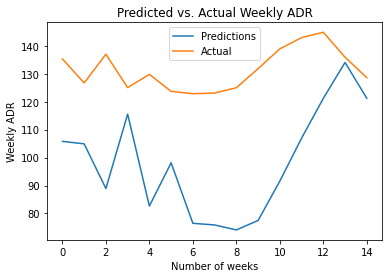

In [79]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Weekly ADR')
plt.title("Predicted vs. Actual Weekly ADR")
plt.legend(loc = 'upper center')
plt.show()

In [80]:
np.mean(actualpd)

131.41955578664096